## DT

In [6]:
from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score 

import pandas as pd

model = pd.read_csv("AXISBANK.csv")

meanv=model['Moving Avg'].mean()

model['Moving Avg'].fillna(value=meanv,inplace=True)


x=model.iloc[:,:-1].values
y=model.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 



dt = DecisionTreeClassifier(criterion='entropy',random_state=40)


dt.fit(X_train, y_train) 


y_pred = dt.predict(X_test) 

 

dtaccuracy = accuracy_score(y_test, y_pred) 
prec = precision_score(y_test, y_pred)
print(prec)
rec = recall_score(y_test, y_pred)
print(rec)
print("Accuracy:", dtaccuracy*100) 

0.673469387755102
0.6305732484076433
Accuracy: 73.5


## SVM

In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split 

from sklearn.svm import SVC 

from sklearn.metrics import accuracy_score 


model = pd.read_csv("AXISBANK.csv")

meanv=model['Moving Avg'].mean()

model['Moving Avg'].fillna(value=meanv,inplace=True)



x=model.iloc[:,:-1].values
y=model.iloc[:,-1].values



X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) 



clf = SVC(kernel='rbf') 


clf.fit(X_train, y_train) 


y_pred = clf.predict(X_test) 


svmaccuracy = accuracy_score(y_test, y_pred) 


print("Accuracy:", svmaccuracy*100) 

Accuracy: 63.5


## RF

In [4]:
from sklearn.datasets import load_iris 

from sklearn.model_selection import train_test_split 

from sklearn.ensemble import RandomForestClassifier 

import pandas as pd


model = pd.read_csv("AXISBANK.csv")

meanv=model['Moving Avg'].mean()

model['Moving Avg'].fillna(value=meanv,inplace=True)


x=model.iloc[:,:-1].values
y=model.iloc[:,-1].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 



rf = RandomForestClassifier(n_estimators=100, random_state=42) 


rf.fit(x_train, y_train) 


y_pred = rf.predict(x_test) 
 

rfaccuracy = accuracy_score(y_test, y_pred) 

print("Accuracy: {:.2f}".format(rfaccuracy*100)) 


Accuracy: 73.50


## LR

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import pandas as pd

model = pd.read_csv("AXISBANK.csv")

meanv=model['Moving Avg'].mean()

model['Moving Avg'].fillna(value=meanv,inplace=True)


X=model.iloc[:,:-1].values
y=model.iloc[:,-1].values
# Split the data into training and test sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


lr = LogisticRegression()

lr.fit(X_train, y_train) 

lraccuracy = lr.score(X_test, y_test) 

print("Accuracy: {:.2f}%".format(lraccuracy * 100))  

Accuracy: 60.25%


## KNN

In [6]:
from sklearn.model_selection import train_test_split 
import pandas as pd

model = pd.read_csv("AXISBANK.csv")

meanv=model['Moving Avg'].mean()

model['Moving Avg'].fillna(value=meanv,inplace=True)


X=model.iloc[:,:-1].values
y=model.iloc[:,-1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

 

from sklearn.neighbors import KNeighborsClassifier 


knn = KNeighborsClassifier(n_neighbors=5) 

knn.fit(X_train, y_train) 


knnaccuracy = knn.score(X_test, y_test) 

print("Accuracy: {:.2f}%".format(knnaccuracy * 100)) 

Accuracy: 57.75%


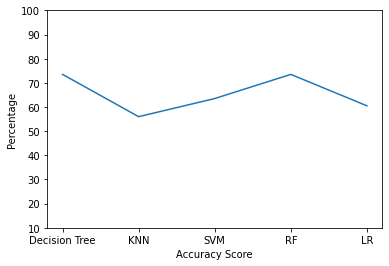

In [7]:
import matplotlib.pyplot as plt
x=['Decision Tree','KNN','SVM','RF','LR']
y=[73.5,56,63.5,73.5,60.5]
plt.ylim(10,100)
plt.ylabel("Percentage")
plt.xlabel("Accuracy Score")
plt.plot(x,y)

In [8]:
from sklearn.ensemble import VotingClassifier
model = pd.read_csv("AXISBANK.csv")

meanv=model['Moving Avg'].mean()

model['Moving Avg'].fillna(value=meanv,inplace=True)

X=model.iloc[:,:-1].values
y=model.iloc[:,-1].values

tree = DecisionTreeClassifier(max_depth=3)
rf = RandomForestClassifier(n_estimators=100)
lr = LogisticRegression(max_iter=100)
knn = KNeighborsClassifier(n_neighbors=3)
svm = SVC(kernel='rbf')

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=44)
mod = VotingClassifier(estimators=[('tree',tree),('rf',rf),('lr',lr),('knn',knn),('svm',svm)],voting='hard')

In [10]:
mod.fit(X_train,y_train)

y_pred = mod.predict(X_test)

acc = accuracy_score(y_test,y_pred)

print("Accuracy= ", acc*100)

Accuracy=  64.25


In [ ]:
import matplotlib.pyplot as plt 

acc= [73.5,73.5,73.5,73.5,73.5,73.5,73.5,73.5,73.5,73.5]
pres=[67.3,67.3,67.3,67.3,67.3,67.3,67.3,67.3,67.3,67.3]
rec=[63.05,63.05,63.05,63.05,63.05,63.05,63.05,63.05,63.05,63.05]

plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.plot(acc)
plt.plot(pres)
plt.plot(rec)
plt.xlabel('Iteration')
plt.ylabel('Value in %')
plt.title('Logistic Regression')